In [1]:
import pandas as pd

# Assuming the dataset file is named 'train.csv'
df = pd.read_csv('quora_train.csv')


In [2]:
# Display the first few rows of the dataset
print(df.head())

# Get basic statistics of the dataset
print(df.describe())


   id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0  
                  id           qid1           qid2   is_duplicate
count  404290.000000  404290.000000  404290.000000  404290.000000
mean   202144.500000 

In [3]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values if necessary
# For example, drop rows with missing values
df = df.dropna()


id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64


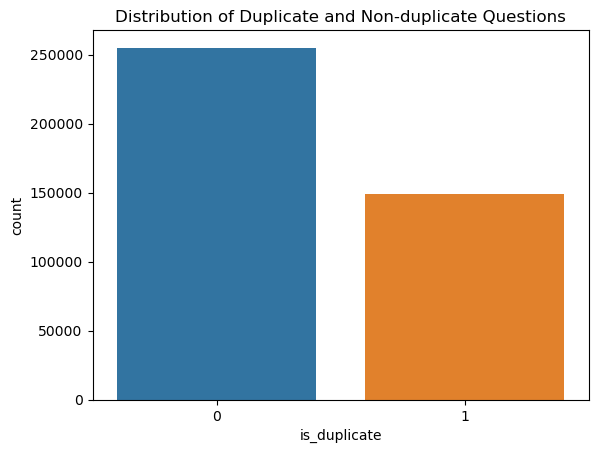

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of target variable (is_duplicate)
sns.countplot(x='is_duplicate', data=df)
plt.title('Distribution of Duplicate and Non-duplicate Questions')
plt.show()


In [7]:

from wordcloud import WordCloud

# Generate a word cloud for the entire dataset
text = ' '.join(df['question1'].astype(str) + ' ' + df['question2'].astype(str))
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [8]:
# Concatenate 'question1' and 'question2' to get all questions
all_questions = pd.concat([df['question1'], df['question2']])

# Get the number of unique questions
num_unique_questions = len(all_questions.unique())

print(f"Number of unique questions: {num_unique_questions}")


Number of unique questions: 537359


In [9]:
# Concatenate 'question1' and 'question2' to get all questions
all_questions = pd.concat([df['question1'], df['question2']])

# Get the count of each question
question_counts = all_questions.value_counts()

# Filter questions that appear only once
unique_questions = question_counts[question_counts == 1].index

# Filter questions that are repeated
repeated_questions = question_counts[question_counts > 1].index

print(f"Number of questions appearing only once: {len(unique_questions)}")
print(f"Number of repeated questions: {len(repeated_questions)}")


Number of questions appearing only once: 425489
Number of repeated questions: 111870


In [10]:
# Concatenate 'question1' and 'question2' to get all questions
all_questions = pd.concat([df['question1'], df['question2']])

# Get the count of each question
question_occurrences = all_questions.value_counts()

# Display the number of occurrences for each question
print("Number of occurrences for each question:")
print(question_occurrences)


Number of occurrences for each question:
What are the best ways to lose weight?                                                    161
How can you look at someone's private Instagram account without following them?           120
How can I lose weight quickly?                                                            111
What's the easiest way to make money online?                                               88
Can you see who views your Instagram?                                                      79
                                                                                         ... 
How much do toucans eat in a day? What do they eat?                                         1
Is it a logical move for Kiip.me to grow their business on the Mountain Lion platform?      1
Is Hla b27 curable?                                                                         1
Why are passports different colours?                                                        1
What is it like to 

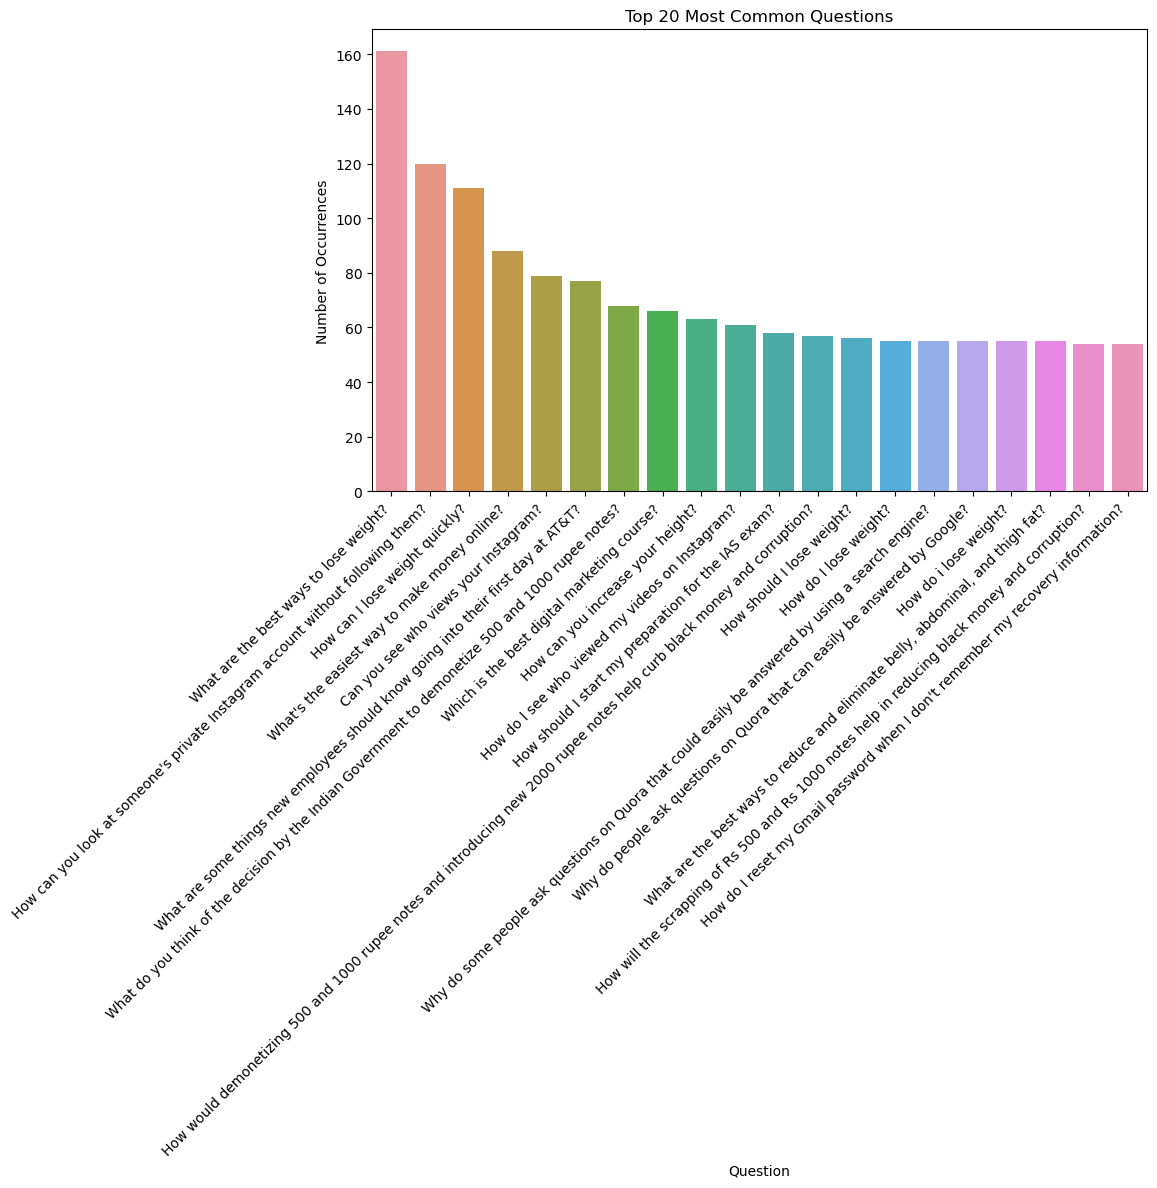

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate 'question1' and 'question2' to get all questions
all_questions = pd.concat([df['question1'], df['question2']])

# Get the count of each question
question_occurrences = all_questions.value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=question_occurrences.index[:20], y=question_occurrences.values[:20])
plt.xticks(rotation=45, ha="right")
plt.xlabel('Question')
plt.ylabel('Number of Occurrences')
plt.title('Top 20 Most Common Questions')
plt.show()


In [12]:
# Find the question with the highest occurrence
most_common_question = question_occurrences.idxmax()
highest_occurrence = question_occurrences.max()

print(f"The question with the highest occurrence is:\n{most_common_question}")
print(f"Number of occurrences: {highest_occurrence}")


The question with the highest occurrence is:
What are the best ways to lose weight?
Number of occurrences: 161


In [13]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()


id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64


In [14]:
# Remove duplicate rows
df = df.drop_duplicates()


In [15]:
import re
from nltk.stem import PorterStemmer

# Example text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)  # Remove special characters
    # Additional cleaning steps as needed
    return text

# Apply text cleaning to specific columns
df['question1'] = df['question1'].apply(clean_text)
df['question2'] = df['question2'].apply(clean_text)


In [16]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [20]:
# Drop irrelevant columns
df = df.drop(['example_column1', 'example_column2'], axis=1)



KeyError: "['example_column1', 'example_column2'] not found in axis"

In [18]:
# Convert a column to a specific data type
df['column_name'] = df['column_name'].astype('category')


KeyError: 'column_name'

In [19]:
from scipy import stats

# Example: Remove rows with outliers in a specific column
z_scores = stats.zscore(df['numeric_column'])
df = df[(z_scores < 3) & (z_scores > -3)]


KeyError: 'numeric_column'

In [21]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [29]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')
import nltk
import nltk
import nltk
nltk.download('omw-1.4')
  
# Download only essential resources (excluding omw-1.4)
nltk.download(['punkt'], quiet=True, raise_on_error=True)

# Download only essential resources
nltk.download('punkt', quiet=True, raise_on_error=True)


# Download NLTK resources (stopwords and WordNet)
nltk.download('stopwords')
nltk.download('wordnet')

# Function for text cleaning
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back into a string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

# Apply text cleaning to specific columns (e.g., 'question1' and 'question2')
df['question1'] = df['question1'].apply(clean_text)
df['question2'] = df['question2'].apply(clean_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\FAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FAHAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Violin Plot
sns.violinplot(x='values', data=df)

# Show the plot
plt.show()


ValueError: Could not interpret input 'values'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Distribution Plot
sns.histplot(df['values'], kde=True)

# Show the plot
plt.show()


In [ ]:
# Violin Plot with two variables
sns.violinplot(x='variable1', y='variable2', data=df)

# Distribution Plot with two variables
sns.scatterplot(x='variable1', y='variable2', data=df)
